In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
n = 1000000

def run_map(n):
    return list(map(lambda x: x**2, np.arange(n)))

def run_comprehend(n):
    return [x**2 for x in np.arange(n)]

def run_for(n):
    res = []
    for x in np.arange(n):
        res.append(x**2)
    return res

In [57]:
%%time
res = run_map(n)

Wall time: 212 ms


In [58]:
%%time
res = run_comprehend(n)

Wall time: 175 ms


In [59]:
%%time
res = run_for(n)

Wall time: 201 ms


In [60]:
from timeit import default_timer as timer

def run_bench(runner, runs, n):
    measurements = []
    for i in range(runs):
        start = timer()
        res = runner(n)
        end = timer()
        measurements.append(end - start)
    return measurements

In [61]:
#sns.histplot(data=run_bench(run_map, 200, n))
map_times = run_bench(run_map, 500, n)
compr_times = run_bench(run_comprehend, 500, n)
for_times = run_bench(run_for, 500, n)

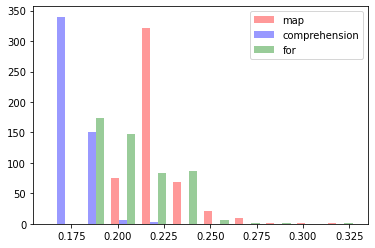

In [62]:
fig, ax = plt.subplots()
#sns.histplot(map_times, ax=ax)
#sns.histplot(compr_times, ax=ax)
#sns.histplot(for_times, ax=ax)
plt.hist([map_times, compr_times, for_times], color=['r','b', 'g'], alpha=0.4, label=['map', 'comprehension', 'for'])
plt.legend()